In [78]:
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
# import io, base64, os, json, re 
import pandas as pd
import numpy as np
import datetime
from random import randint

In [79]:
# Yahoo Finance (https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC)
# The S&P(standard and poor's) 500 measures the performance of the 500 largest companies, many many different types of businesses
# GSPC is the ticker symbol for the S&P 500 index

gspc_df = pd.read_csv('^GSPC_FULL.csv')



gspc_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0


In [80]:
gspc_df['Date'] = pd.to_datetime(gspc_df['Date'])

cut_off_date = '1950-01-05'  # There is no volume data before 1950, so we will cut off the data before this date
gspc_df = gspc_df[gspc_df['Date'] >= cut_off_date] 
gspc_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
5498,1950-01-05,16.930000,16.930000,16.930000,16.930000,16.930000,2550000
5499,1950-01-06,16.980000,16.980000,16.980000,16.980000,16.980000,2010000
5500,1950-01-09,17.080000,17.080000,17.080000,17.080000,17.080000,2520000
5501,1950-01-10,17.030001,17.030001,17.030001,17.030001,17.030001,2160000
5502,1950-01-11,17.090000,17.090000,17.090000,17.090000,17.090000,2630000


In [81]:
row_start = randint(0, len(gspc_df)-12)
row_start

5156

In [82]:
gspc_df.iloc[row_start:row_start+12]

,Date,Open,High,Low,Close,Adj Close,Volume
10654,1970-08-17,0.0,75.790001,74.519997,75.330002,75.330002,6940000
10655,1970-08-18,0.0,76.790001,75.300003,76.199997,76.199997,9500000
10656,1970-08-19,0.0,77.580002,76.010002,76.959999,76.959999,9870000
10657,1970-08-20,0.0,77.989998,76.300003,77.839996,77.839996,10170000
10658,1970-08-21,0.0,79.599998,77.459999,79.239998,79.239998,13420000
10659,1970-08-24,0.0,81.620003,79.410004,80.989998,80.989998,18910000
10660,1970-08-25,0.0,81.809998,79.690002,81.120003,81.120003,17520000
10661,1970-08-26,0.0,82.260002,80.599998,81.209999,81.209999,15970000
10662,1970-08-27,0.0,81.910004,80.129997,81.080002,81.080002,12440000
10663,1970-08-28,0.0,82.470001,80.690002,81.860001,81.860001,13820000


In [83]:
gspc_df['Close'].shift(1)

5498             NaN
5499       16.930000
5500       16.980000
5501       17.080000
5502       17.030001
            ...     
24129    4850.430176
24130    4864.600098
24131    4868.549805
24132    4894.160156
24133    4890.970215
Name: Close, Length: 18636, dtype: float64

In [84]:
# take random sets of sequential rows 
# The purpose of taking random sets of sequential rows could be to simulate different scenarios or to create a diverse dataset for analysis. 
new_set = []
for row_set in range(0, 500000):
    if row_set%2000==0: print(row_set)
    row_quant = randint(10, 30)
    row_start = randint(0, len(gspc_df)-row_quant) # Don't want to go out of bounds
    market_subset = gspc_df.iloc[row_start:row_start+row_quant]

    Close_Date = max(market_subset['Date'])
    if row_set%2000==0: print(Close_Date)
    
    # Close_Gap = (market_subset['Close'] - market_subset['Close'].shift(1)) / market_subset['Close'].shift(1)
    
    Close_Gap = market_subset['Close'].pct_change()
    High_Gap = market_subset['High'].pct_change()
    Low_Gap = market_subset['Low'].pct_change() 
    Volume_Gap = market_subset['Volume'].pct_change() 
    Daily_Change = (market_subset['Close'] - market_subset['Open']) / market_subset['Open']
    Outcome_Next_Day_Direction = (market_subset['Volume'].shift(-1) - market_subset['Volume'])
    #This computes the difference in volume between the next day and the current day, effectively capturing the change in volume.
    
    new_set.append(pd.DataFrame({'Sequence_ID':[row_set]*len(market_subset),  #set of days which has same id
                            'Close_Date':[Close_Date]*len(market_subset),
                           'Close_Gap':Close_Gap,
                           'High_Gap':High_Gap,
                           'Low_Gap':Low_Gap,
                           'Volume_Gap':Volume_Gap,
                           'Daily_Change':Daily_Change,
                           'Outcome_Next_Day_Direction':Outcome_Next_Day_Direction}))

0
1993-09-30 00:00:00
2000
1962-04-05 00:00:00
4000
2007-08-30 00:00:00
6000
2005-09-01 00:00:00
8000
1979-05-01 00:00:00
10000
1966-10-12 00:00:00
12000
1969-11-17 00:00:00
14000
2010-11-10 00:00:00
16000
1965-02-05 00:00:00
18000
2018-09-24 00:00:00
20000
1957-10-24 00:00:00
22000
1999-03-19 00:00:00
24000
1991-05-20 00:00:00
26000
1993-01-14 00:00:00
28000
1985-03-19 00:00:00
30000
1957-09-18 00:00:00
32000
1968-06-21 00:00:00
34000
2009-09-10 00:00:00
36000
1978-10-16 00:00:00
38000
2009-07-08 00:00:00
40000
1974-10-25 00:00:00
42000
1978-12-08 00:00:00
44000
1972-11-14 00:00:00
46000
1968-02-19 00:00:00
48000
2019-01-04 00:00:00
50000
2021-11-12 00:00:00
52000
1958-09-10 00:00:00
54000
2011-06-23 00:00:00
56000
1969-08-25 00:00:00
58000
1962-11-15 00:00:00
60000
1960-01-06 00:00:00
62000
1991-04-18 00:00:00
64000
2020-11-19 00:00:00
66000
2008-10-29 00:00:00
68000
2017-07-13 00:00:00
70000
1999-10-14 00:00:00
72000
1985-04-30 00:00:00
74000
2004-03-29 00:00:00
76000
2001-12-06 00:

In [85]:
len(market_subset)


20

In [86]:
new_set_df = pd.concat(new_set)
print(new_set_df.shape)

(9994819, 8)


In [87]:
new_set_df.tail(20)

,Sequence_ID,Close_Date,Close_Gap,High_Gap,Low_Gap,Volume_Gap,Daily_Change,Outcome_Next_Day_Direction
17696,499999,1998-07-27,NaN,NaN,NaN,NaN,0.004668,192850000.0
17697,499999,1998-07-27,-0.004084,-0.003799,-0.001077,0.341721,-0.004084,-55600000.0
17698,499999,1998-07-27,0.012983,0.006802,0.001643,-0.073428,0.012983,-191390000.0
17699,499999,1998-07-27,-0.001863,0.000000,0.008070,-0.272791,-0.001863,4540000.0
17700,499999,1998-07-27,0.009517,0.007636,0.001785,0.008898,0.009517,110140000.0
17701,499999,1998-07-27,-0.002307,0.002143,0.006829,0.213968,-0.002307,-17660000.0
17702,499999,1998-07-27,0.010150,0.006104,0.001570,-0.028261,0.010150,56370000.0
17703,499999,1998-07-27,-0.006704,-0.000437,0.001186,0.092831,-0.006704,-87520000.0
17704,499999,1998-07-27,0.004980,0.000472,-0.004455,-0.131887,0.004972,-1200000.0
17705,499999,1998-07-27,0.000739,0.000043,0.008107,-0.002083,0.000739,125420000.0


In [88]:
new_set_df = new_set_df.dropna(how='any') 
print(new_set_df.shape)
new_set_df.tail(20)

(8994819, 8)


,Sequence_ID,Close_Date,Close_Gap,High_Gap,Low_Gap,Volume_Gap,Daily_Change,Outcome_Next_Day_Direction
12270,499998,1977-01-12,0.001809,0.001515,0.001534,-0.039595,inf,3240000.0
12271,499998,1977-01-12,-0.010266,-0.001418,-0.006701,0.155321,inf,-1430000.0
17697,499999,1998-07-27,-0.004084,-0.003799,-0.001077,0.341721,-0.004084,-55600000.0
17698,499999,1998-07-27,0.012983,0.006802,0.001643,-0.073428,0.012983,-191390000.0
17699,499999,1998-07-27,-0.001863,0.000000,0.008070,-0.272791,-0.001863,4540000.0
17700,499999,1998-07-27,0.009517,0.007636,0.001785,0.008898,0.009517,110140000.0
17701,499999,1998-07-27,-0.002307,0.002143,0.006829,0.213968,-0.002307,-17660000.0
17702,499999,1998-07-27,0.010150,0.006104,0.001570,-0.028261,0.010150,56370000.0
17703,499999,1998-07-27,-0.006704,-0.000437,0.001186,0.092831,-0.006704,-87520000.0
17704,499999,1998-07-27,0.004980,0.000472,-0.004455,-0.131887,0.004972,-1200000.0


In [89]:
new_set_df.head()


,Sequence_ID,Close_Date,Close_Gap,High_Gap,Low_Gap,Volume_Gap,Daily_Change,Outcome_Next_Day_Direction
16490,0,1993-09-30,-0.008238,0.001045,-0.004572,-0.393948,-0.008260,69180000.0
16491,0,1993-09-30,-0.004615,-0.008937,-0.011780,0.299312,-0.004615,-1350000.0
16492,0,1993-09-30,0.007175,0.002457,0.007339,-0.004495,0.007197,-23610000.0
16493,0,1993-09-30,0.003376,0.003874,0.007308,-0.078974,0.003266,-27080000.0
16494,0,1993-09-30,-0.000240,-0.000283,0.001469,-0.098348,-0.000240,-3350000.0


In [90]:
# confirm sequence
# new_set_df[new_set_df['Close_Date'] == '1973-06-27'] {HLH, HLH, HHH, HHH, LLL, LML, LML, LLL, LHL, ...	

In [91]:
new_set_df.head()

,Sequence_ID,Close_Date,Close_Gap,High_Gap,Low_Gap,Volume_Gap,Daily_Change,Outcome_Next_Day_Direction
16490,0,1993-09-30,-0.008238,0.001045,-0.004572,-0.393948,-0.008260,69180000.0
16491,0,1993-09-30,-0.004615,-0.008937,-0.011780,0.299312,-0.004615,-1350000.0
16492,0,1993-09-30,0.007175,0.002457,0.007339,-0.004495,0.007197,-23610000.0
16493,0,1993-09-30,0.003376,0.003874,0.007308,-0.078974,0.003266,-27080000.0
16494,0,1993-09-30,-0.000240,-0.000283,0.001469,-0.098348,-0.000240,-3350000.0


In [92]:
# create sequences
# simplify the data by binning values into three groups
 
# Close_Gap
new_set_df['Close_Gap_LMH'] = pd.qcut(new_set_df['Close_Gap'], 3, labels=["L", "M", "H"])  #used to bin numerical data into quantiles. It divides the data into intervals with an equal number of data points.

# High_Gap - not used in this example
new_set_df['High_Gap_LMH'] = pd.qcut(new_set_df['High_Gap'], 3, labels=["L", "M", "H"])

# Low_Gap - not used in this example
new_set_df['Low_Gap_LMH'] = pd.qcut(new_set_df['Low_Gap'], 3, labels=["L", "M", "H"])

# Volume_Gap
new_set_df['Volume_Gap_LMH'] = pd.qcut(new_set_df['Volume_Gap'], 3, labels=["L", "M", "H"])
 
# Daily_Change
new_set_df['Daily_Change_LMH'] = pd.qcut(new_set_df['Daily_Change'], 3, labels=["L", "M", "H"])

# new set
new_set_df = new_set_df[["Sequence_ID", 
                         "Close_Date", 
                         "Close_Gap_LMH", 
                         "Volume_Gap_LMH", 
                         "Daily_Change_LMH", 
                         "Outcome_Next_Day_Direction"]]



/opt/homebrew/lib/python3.11/site-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


In [93]:
new_set_df.tail(10)


,Sequence_ID,Close_Date,Close_Gap_LMH,Volume_Gap_LMH,Daily_Change_LMH,Outcome_Next_Day_Direction
17705,499999,1998-07-27,M,M,M,125420000.0
17706,499999,1998-07-27,H,H,M,23600000.0
17707,499999,1998-07-27,L,M,L,-46100000.0
17708,499999,1998-07-27,H,L,M,-59770000.0
17709,499999,1998-07-27,M,L,M,-57450000.0
17710,499999,1998-07-27,M,L,L,99120000.0
17711,499999,1998-07-27,L,H,L,80100000.0
17712,499999,1998-07-27,M,H,L,1800000.0
17713,499999,1998-07-27,L,M,L,-43000000.0
17714,499999,1998-07-27,M,L,M,-78610000.0


In [94]:
new_set_df['Event_Pattern'] = new_set_df['Close_Gap_LMH'].astype(str) + new_set_df['Volume_Gap_LMH'].astype(str) + new_set_df['Daily_Change_LMH'].astype(str)

In [95]:
new_set_df.tail(10)

,Sequence_ID,Close_Date,Close_Gap_LMH,Volume_Gap_LMH,Daily_Change_LMH,Outcome_Next_Day_Direction,Event_Pattern
17705,499999,1998-07-27,M,M,M,125420000.0,MMM
17706,499999,1998-07-27,H,H,M,23600000.0,HHM
17707,499999,1998-07-27,L,M,L,-46100000.0,LML
17708,499999,1998-07-27,H,L,M,-59770000.0,HLM
17709,499999,1998-07-27,M,L,M,-57450000.0,MLM
17710,499999,1998-07-27,M,L,L,99120000.0,MLL
17711,499999,1998-07-27,L,H,L,80100000.0,LHL
17712,499999,1998-07-27,M,H,L,1800000.0,MHL
17713,499999,1998-07-27,L,M,L,-43000000.0,LML
17714,499999,1998-07-27,M,L,M,-78610000.0,MLM


In [96]:
new_set_df['Outcome_Next_Day_Direction'].describe()


count    8.994819e+06
mean     2.155070e+05
std      3.811302e+08
min     -5.044220e+09
25%     -1.041000e+07
50%      0.000000e+00
75%      1.000000e+07
max      4.637230e+09
Name: Outcome_Next_Day_Direction, dtype: float64

In [97]:
# reduce the set
compressed_set = new_set_df.groupby(['Sequence_ID', 
                                     'Close_Date'])['Event_Pattern'].apply(lambda x: "{%s}" % ', '.join(x)).reset_index()

print(compressed_set.shape)
compressed_set.head()

(500000, 3)


,Sequence_ID,Close_Date,Event_Pattern
0,0,1993-09-30,"{LLL, LHL, HMM, HLM, MLL, HMM, MML, LHL}"
1,1,1953-01-07,"{MML, MLL, MML, LML, MML, HHL, HHL, MLL, MML, ..."
2,2,1951-03-14,"{MML, HML, LHL, MLL, MHL, HLL, MHL, LML, LHL}"
3,3,2008-12-30,"{HMH, HMH, LLL, HMM, LLL, HHM, LLL, HHH, LML, ..."
4,4,1982-08-26,"{HLH, MHM, HHH, LHL, HLM, HHH, HHH, LHL, HLH}"


In [98]:
compressed_set['Sequence_ID'].values

array([     0,      1,      2, ..., 499997, 499998, 499999])

In [99]:
#compressed_outcomes = new_set_df[['Sequence_ID', 'Close_Date', 'Outcome_Next_Day_Direction']].groupby(['Sequence_ID', 'Close_Date']).agg()

compressed_outcomes = new_set_df.groupby(['Sequence_ID', 'Close_Date'])['Outcome_Next_Day_Direction'].mean()
compressed_outcomes = compressed_outcomes.to_frame().reset_index()
print(compressed_outcomes.shape)
compressed_outcomes.describe()

(500000, 3)


,Sequence_ID,Outcome_Next_Day_Direction
count,500000.000000,5.000000e+05
mean,249999.500000,2.101388e+05
std,144337.711635,3.767917e+07
min,0.000000,-6.900150e+08
25%,124999.750000,-8.011765e+05
50%,249999.500000,2.173913e+03
75%,374999.250000,9.545549e+05
max,499999.000000,8.148188e+08


In [100]:
compressed_outcomes.head()

,Sequence_ID,Close_Date,Outcome_Next_Day_Direction
0,0,1993-09-30,6.231250e+06
1,1,1953-01-07,-1.360000e+04
2,2,1951-03-14,5.555556e+04
3,3,2008-12-30,-1.585981e+08
4,4,1982-08-26,1.029000e+07


In [138]:
compress_set= pd.merge(compress_set,compress_outcomes,on=['sqis,',clio])
print(compressed_set.shape)
compressed_set.head()

KeyError: 'Close_Date'

In [102]:
# # reduce set 

# compressed_set = new_set_df.groupby(['Sequence_ID', 'Close_Date','Outcome_Next_Day_Direction'])['Event_Pattern'].apply(lambda x: "{%s}" % ', '.join(x)).reset_index()

compressed_set['Event_Pattern'] = [''.join(e.split()).replace('{','')
                                   .replace('}','') for e in compressed_set['Event_Pattern'].values]
compressed_set.head()

,Sequence_ID,Close_Date,Event_Pattern,Outcome_Next_Day_Direction
0,0,1993-09-30,"LLL,LHL,HMM,HLM,MLL,HMM,MML,LHL",6.231250e+06
1,1,1953-01-07,"MML,MLL,MML,LML,MML,HHL,HHL,MLL,MML,MHL,MML,MM...",-1.360000e+04
2,2,1951-03-14,"MML,HML,LHL,MLL,MHL,HLL,MHL,LML,LHL",5.555556e+04
3,3,2008-12-30,"HMH,HMH,LLL,HMM,LLL,HHM,LLL,HHH,LML,LML,MHM,LL...",-1.585981e+08
4,4,1982-08-26,"HLH,MHM,HHH,LHL,HLM,HHH,HHH,LHL,HLH",1.029000e+07


In [103]:
# # use last x days of data for validation
# compressed_set_validation = compressed_set[compressed_set['Close_Date'] >= datetime.datetime.now() 
#                                            - datetime.timedelta(days=90)] # Sys.Date()-90 

# compressed_set_validation.shape

In [104]:
compressed_set_validation = compressed_set.tail(90)
compressed_set_validation.columns

Index(['Sequence_ID', 'Close_Date', 'Event_Pattern',
       'Outcome_Next_Day_Direction'],
      dtype='object')

In [105]:
compressed_set_validation['Sequence_ID'].values

array([499910, 499911, 499912, 499913, 499914, 499915, 499916, 499917,
       499918, 499919, 499920, 499921, 499922, 499923, 499924, 499925,
       499926, 499927, 499928, 499929, 499930, 499931, 499932, 499933,
       499934, 499935, 499936, 499937, 499938, 499939, 499940, 499941,
       499942, 499943, 499944, 499945, 499946, 499947, 499948, 499949,
       499950, 499951, 499952, 499953, 499954, 499955, 499956, 499957,
       499958, 499959, 499960, 499961, 499962, 499963, 499964, 499965,
       499966, 499967, 499968, 499969, 499970, 499971, 499972, 499973,
       499974, 499975, 499976, 499977, 499978, 499979, 499980, 499981,
       499982, 499983, 499984, 499985, 499986, 499987, 499988, 499989,
       499990, 499991, 499992, 499993, 499994, 499995, 499996, 499997,
       499998, 499999])

In [106]:
compressed_set = compressed_set[compressed_set['Close_Date'] < datetime.datetime.now() 
                                           - datetime.timedelta(days=90)]  
compressed_set.shape

(498608, 4)

In [107]:
list(compressed_set)


['Sequence_ID', 'Close_Date', 'Event_Pattern', 'Outcome_Next_Day_Direction']

In [108]:
# drop date field
compressed_set = compressed_set[['Sequence_ID', 'Event_Pattern','Outcome_Next_Day_Direction']]
compressed_set_validation = compressed_set_validation[['Sequence_ID', 'Event_Pattern','Outcome_Next_Day_Direction']]

##Keep big moves only and build outcome variable

In [109]:
compressed_set['Outcome_Next_Day_Direction'].describe()

count    4.986080e+05
mean     2.321365e+05
std      3.739380e+07
min     -6.672212e+08
25%     -7.875000e+05
50%      2.222222e+03
75%      9.440000e+05
max      8.148188e+08
Name: Outcome_Next_Day_Direction, dtype: float64

In [110]:
print(len(compressed_set['Outcome_Next_Day_Direction']))
len(compressed_set[abs(compressed_set['Outcome_Next_Day_Direction']) > 10000000])

498608


124064

In [111]:
print(compressed_set.shape)
compressed_set = compressed_set[abs(compressed_set['Outcome_Next_Day_Direction']) > 10000000]
print(compressed_set.shape)

(498608, 3)
(124064, 3)


In [112]:
ll = pd.DataFrame([[1,2,3,4,5,6],[11,12,13,14,15,16]]).T
print(ll.head())
# for i in ll.iloc[:,0]:
#     patterns = ll[ll.iloc[:,0] == i].iloc[:,1]
#     print(patterns)
#     break


ll[0][0]


   0   1
0  1  11
1  2  12
2  3  13
3  4  14
4  5  15


1

In [113]:
# keep only keep big/interesting moves 
print('all moves:', len(compressed_set))
compressed_set = compressed_set[abs(compressed_set['Outcome_Next_Day_Direction']) > 10000000]
compressed_set['Outcome_Next_Day_Direction'] = np.where((compressed_set['Outcome_Next_Day_Direction'] > 0), 1, 0)
compressed_set_validation['Outcome_Next_Day_Direction'] = np.where((compressed_set_validation['Outcome_Next_Day_Direction'] > 0), 1, 0)
print('big moves only:', len(compressed_set))

all moves: 124064
big moves only: 124064


In [114]:
compressed_set.head()


,Sequence_ID,Event_Pattern,Outcome_Next_Day_Direction
3,3,"HMH,HMH,LLL,HMM,LLL,HHM,LLL,HHH,LML,LML,MHM,LL...",0
4,4,"HLH,MHM,HHH,LHL,HLM,HHH,HHH,LHL,HLH",1
18,18,"LLL,HMM,HMM,HHH,LLL,LHL,MML,LML,HMM,HHH,LML,HL...",1
20,20,"HHM,LLL,HMH,LLL,HMM,HHH,LLL,LML,HMM,MHL,HLM,HM...",0
22,22,"LML,LHL,HLH,LLL,HMH,HMM,LHL,HLM",1


In [115]:
# create two data sets - won/not won
compressed_set_pos = compressed_set[compressed_set['Outcome_Next_Day_Direction']==1][['Sequence_ID', 'Event_Pattern']]
print(compressed_set_pos.shape)
compressed_set_neg = compressed_set[compressed_set['Outcome_Next_Day_Direction']==0][['Sequence_ID', 'Event_Pattern']]
print(compressed_set_neg.shape)

(62796, 2)
(61268, 2)


In [116]:
flat_list = [item.split(',') for item in compressed_set['Event_Pattern'].values ]
unique_patterns = ','.join(str(r) for v in flat_list for r in v)
unique_patterns = list(set(unique_patterns.split(',')))
len(unique_patterns)

23

In [117]:
unique_patterns

['LMM',
 'LHL',
 'LHH',
 'HLM',
 'HMM',
 'HHM',
 'LLL',
 'LML',
 'HHH',
 'HHL',
 'LHM',
 'MMM',
 'MHH',
 'HLH',
 'MHL',
 'LLM',
 'MLM',
 'HLL',
 'MHM',
 'HML',
 'MML',
 'HMH',
 'MLL']

In [118]:
compressed_set['Outcome_Next_Day_Direction'].head()       


3     0
4     1
18    1
20    0
22    1
Name: Outcome_Next_Day_Direction, dtype: int64

Build the markov transition grid

In [119]:

ll = [1,2,3]

for i in ll:
    for j in ll:
        print(i," ",j)


1   1
1   2
1   3
2   1
2   2
2   3
3   1
3   2
3   3


In [120]:
# kk = [123,345,673,789,567]

# kk.contains(3)
# 123,345,673

In [121]:
# build the markov transition grid
def build_transition_grid(compressed_grid, unique_patterns):
    # build the markov transition grid

    patterns = []
    counts = []
    for from_event in unique_patterns:

        # how many times 
        for to_event in unique_patterns:
            pattern = from_event + ',' + to_event # MMM,MlM

            ids_matches = compressed_grid[compressed_grid['Event_Pattern'].str.contains(pattern)]
            found = 0
            if len(ids_matches) > 0:
                Event_Pattern = '---'.join(ids_matches['Event_Pattern'].values)
                
                found = Event_Pattern.count(pattern)
                
            patterns.append(pattern)
            counts.append(found)
       

    # create to/from grid
    grid_Df = pd.DataFrame({'pairs':patterns, 'counts': counts})
    grid_Df.head()
    

    #grid_Df['x'], grid_Df['y'] = grid_Df['pairs'].str.split(',', 1).str
    #grid_Df[['x', 'y']] = grid_Df['pairs'].str.split(',', 1, expand=True)
    # Assuming 'pairs' column contains strings like 'x,y'
    grid_Df[['x', 'y']] = grid_Df['pairs'].str.split(',', n=1, expand=True)


    print(grid_Df.head())

    grid_Df = grid_Df.pivot(index='x', columns='y', values='counts')

    grid_Df.columns= [col for col in grid_Df.columns]
    #del grid_Df.index.name

    # replace all NaN with zeros
    grid_Df.fillna(0, inplace=True)
    grid_Df.head()

    #grid_Df.rowSums(transition_dataframe) 
    grid_Df = grid_Df / grid_Df.sum(1)  #normalise
    return (grid_Df)


In [122]:
grid_pos = build_transition_grid(compressed_set_pos, unique_patterns) 
grid_neg = build_transition_grid(compressed_set_neg, unique_patterns)

     pairs  counts    x    y
0  LMM,LMM       0  LMM  LMM
1  LMM,LHL     586  LMM  LHL
2  LMM,LHH       0  LMM  LHH
3  LMM,HLM     333  LMM  HLM
4  LMM,HMM     560  LMM  HMM
     pairs  counts    x    y
0  LMM,LMM       0  LMM  LMM
1  LMM,LHL     330  LMM  LHL
2  LMM,LHH       0  LMM  LHH
3  LMM,HLM     350  LMM  HLM
4  LMM,HMM     346  LMM  HMM


In [123]:
grid_neg.shape

(23, 23)

In [124]:
grid_neg.head()


,HHH,HHL,HHM,HLH,HLL,HLM,HMH,HML,HMM,LHH,...,LLM,LML,LMM,MHH,MHL,MHM,MLL,MLM,MML,MMM
x,,,,,,,,,,,,,,,,,,,,,
HHH,0.043756,0.0,0.020359,0.055336,0.000000,0.036782,0.073434,0.000000,0.031489,0.0,...,0.123138,0.062393,0.000000,0.0,0.021951,0.001497,0.059310,0.101313,0.036957,0.018751
HHL,0.000000,0.0,0.001881,0.002385,0.000000,0.000000,0.006780,0.000000,0.003411,0.0,...,0.000000,0.001812,0.000000,0.0,0.000000,0.000000,0.008696,0.004656,0.000000,0.000000
HHM,0.037974,0.0,0.052934,0.040974,0.467562,0.102825,0.006280,0.000000,0.059629,0.0,...,0.000000,0.069139,0.087029,0.0,0.035674,0.043291,0.143749,0.080058,0.071895,0.059604
HLH,0.066910,0.0,0.040330,0.024972,0.000000,0.037142,0.061799,0.070936,0.029208,0.0,...,0.126117,0.037247,0.000000,0.0,0.047192,0.038448,0.015742,0.047150,0.021719,0.023907
HLL,0.000000,0.0,0.002658,0.000000,0.000000,0.000000,0.008882,0.000000,0.000000,0.0,...,0.000000,0.000000,0.058178,0.0,0.000000,0.000000,0.000000,0.003918,0.000000,0.000000


In [125]:
grid_pos.head()


,HHH,HHL,HHM,HLH,HLL,HLM,HMH,HML,HMM,LHH,...,LLM,LML,LMM,MHH,MHL,MHM,MLL,MLM,MML,MMM
x,,,,,,,,,,,,,,,,,,,,,
HHH,0.044273,0.0,0.017222,0.070171,0.000000,0.035121,0.044861,0.000000,0.037329,0.0,...,0.182390,0.050139,0.000000,0.0,0.024199,0.009639,0.039161,0.091151,0.026436,0.031490
HHL,0.000000,0.0,0.004336,0.008283,0.000000,0.000000,0.002102,0.000000,0.002905,0.0,...,0.000000,0.001421,0.000000,0.0,0.000000,0.000000,0.007058,0.007134,0.000000,0.000000
HHM,0.030356,0.0,0.040053,0.032862,0.428821,0.078501,0.024219,0.000000,0.081145,0.0,...,0.000000,0.062448,0.105063,0.0,0.045456,0.037669,0.118456,0.077792,0.076467,0.074129
HLH,0.040246,0.0,0.032024,0.019863,0.000000,0.022064,0.048469,0.065068,0.014494,0.0,...,0.131027,0.022418,0.000000,0.0,0.023509,0.017022,0.009735,0.022717,0.015854,0.013131
HLL,0.000000,0.0,0.001302,0.000000,0.000000,0.000000,0.002792,0.000000,0.000000,0.0,...,0.000000,0.000000,0.033228,0.0,0.000000,0.000000,0.000000,0.001313,0.000000,0.000000


In [126]:
grid_pos.columns

Index(['HHH', 'HHL', 'HHM', 'HLH', 'HLL', 'HLM', 'HMH', 'HML', 'HMM', 'LHH',
       'LHL', 'LHM', 'LLL', 'LLM', 'LML', 'LMM', 'MHH', 'MHL', 'MHM', 'MLL',
       'MLM', 'MML', 'MMM'],
      dtype='object')

In [127]:
# compressed_set_validation[compressed_set_validation['Sequence_ID' == seq_id]]

In [128]:
compressed_set_validation['Sequence_ID'].values

array([499910, 499911, 499912, 499913, 499914, 499915, 499916, 499917,
       499918, 499919, 499920, 499921, 499922, 499923, 499924, 499925,
       499926, 499927, 499928, 499929, 499930, 499931, 499932, 499933,
       499934, 499935, 499936, 499937, 499938, 499939, 499940, 499941,
       499942, 499943, 499944, 499945, 499946, 499947, 499948, 499949,
       499950, 499951, 499952, 499953, 499954, 499955, 499956, 499957,
       499958, 499959, 499960, 499961, 499962, 499963, 499964, 499965,
       499966, 499967, 499968, 499969, 499970, 499971, 499972, 499973,
       499974, 499975, 499976, 499977, 499978, 499979, 499980, 499981,
       499982, 499983, 499984, 499985, 499986, 499987, 499988, 499989,
       499990, 499991, 499992, 499993, 499994, 499995, 499996, 499997,
       499998, 499999])

In [129]:
# ll = [1,2,3,4]
# vd = [12,13,14,15]
# for i in ll:
#     patterns = vd[id==i].values(0)

In [130]:
compressed_set_validation.head()

,Sequence_ID,Event_Pattern,Outcome_Next_Day_Direction
499910,499910,"MLL,MHL,MHL,HLM,HMM,MLL,LHL,MMM,LML,HHH,HLH,HL...",1
499911,499911,"LML,HLH,LLL,LHL,LLL,LHL,HLH,LHL,HMM,MLM,MML,HL...",0
499912,499912,"MLL,LHL,LLL,LML,HLL,LHL,MML,LML,MHL,HLL",1
499913,499913,"MMM,HMM,LML,LHL,LLL,HMM,HHM,HMM,HHH,HMM,MLM,MM...",0
499914,499914,"HMM,HMM,MMM,HLM,MHL,LML,LML,LHL,LLL,HHH,HHH,ML...",0


In [131]:
# [1,2,3,4][7,6,4,2]

In [132]:
def safe_log(x,y):
   try:
      lg = np.log(x/y)
   except:
      lg = 0
   return lg

# predict on out of sample data
actual = []
predicted = []
for seq_id in compressed_set_validation['Sequence_ID'].values:
    patterns = compressed_set_validation[compressed_set_validation['Sequence_ID'] == seq_id]['Event_Pattern'].values[0].split(',')
    pos = []
    neg = []
    log_odds = []
    
    for id in range(0, len(patterns)-1):
        # get log odds
        # logOdds = log(tp(i,j) / tn(i,j)
        if (patterns[id] in list(grid_pos) and patterns[id+1] in list(grid_pos) and patterns[id] in list(grid_neg) and patterns[id+1] in list(grid_neg)):
                
            numerator = grid_pos[patterns[id]][patterns[id+1]]
            denominator = grid_neg[patterns[id]][patterns[id+1]]
            if (numerator == 0 and denominator == 0):
                log_value =0
            elif (denominator == 0):
                log_value = np.log(numerator / 0.00001)
            elif (numerator == 0):
                log_value = np.log(0.00001 / denominator)
            else:
                log_value = np.log(numerator/denominator)
        else:
            log_value = 0
        
        log_odds.append(log_value)
        
        pos.append(numerator)
        neg.append(denominator)
      
    print('outcome:', compressed_set_validation[compressed_set_validation['Sequence_ID']==seq_id]['Outcome_Next_Day_Direction'].values[0])
    print(sum(pos)/sum(neg))
    # print("actual",compressed_set_validation[compressed_set_validation['Sequence_ID']==seq_id]['Outcome_Next_Day_Direction'].values[0])
    print("predicted",sum(log_odds))

    actual.append(compressed_set_validation[compressed_set_validation['Sequence_ID']==seq_id]['Outcome_Next_Day_Direction'].values[0])
    predicted.append(sum(log_odds))

from sklearn.metrics import confusion_matrix

confusion_matrix(actual, [1 if p > 0 else 0 for p in predicted])


outcome: 1
1.0140243259420736
predicted 0.11218263157302874
outcome: 0
1.024079369941395
predicted -0.38109541248250495
outcome: 1
1.0512845991849689
predicted 0.4221741507002402
outcome: 0
1.005809464500779
predicted -0.4144733535848033
outcome: 0
1.0435972906111803
predicted 0.28793780563736193
outcome: 1
1.0070432042996846
predicted -1.9096480494540258
outcome: 1
1.844927145606245
predicted 3.1766594778371586
outcome: 0
1.0290563409590527
predicted -0.13801848034128805
outcome: 1
1.0719639271996484
predicted 0.38112088384648823
outcome: 0
1.0356739777296162
predicted 0.4530769768604526
outcome: 1
1.049338695882835
predicted 0.10231265293171604
outcome: 0
0.9972342048232168
predicted -0.5182764898287813
outcome: 0
0.7781227166048097
predicted -0.49578395740567094
outcome: 1
1.0076684680962782
predicted -0.1611214447580909
outcome: 1
1.0759726153006788
predicted 1.1433707464913307
outcome: 1
1.048062473302283
predicted -0.07295958880818246
outcome: 1
0.7199261898286478
predicted 2.119

array([[27, 22],
       [17, 24]])

In [133]:
from sklearn.metrics import accuracy_score
score = accuracy_score(actual, [1 if p > 0 else 0 for p in predicted])
print('Accuracy:', round(score * 100,2), '%')

Accuracy: 56.67 %


In [134]:
import seaborn as sns
cm = confusion_matrix(actual, [1 if p > 0 else 0 for p in predicted])
cm

array([[27, 22],
       [17, 24]])

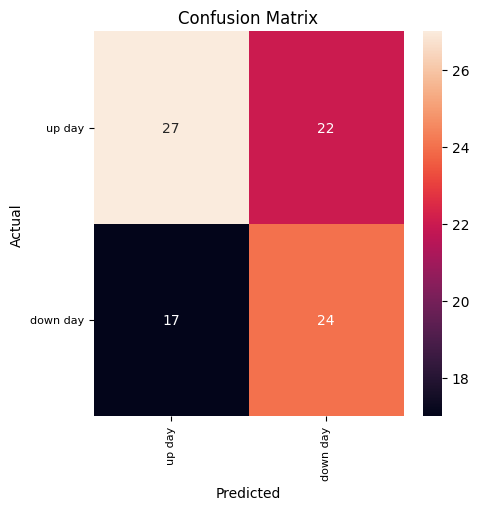

In [135]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, ax = ax, fmt='g')

ax.set_title('Confusion Matrix') 
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['up day','down day'])
ax.yaxis.set_ticklabels(['up day','down day'])
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 8)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 8)  
plt.show()

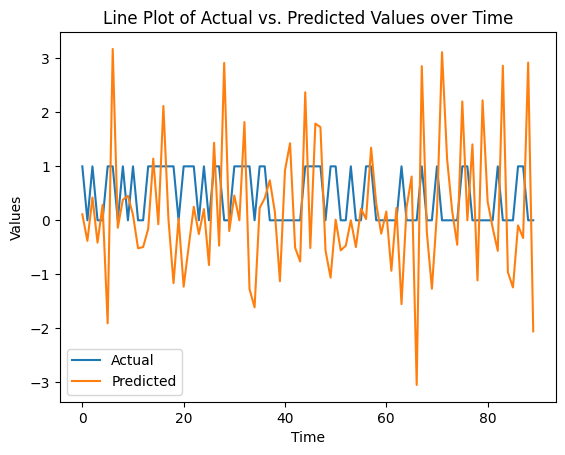

In [136]:
plt.plot(actual, label='Actual')
plt.plot(predicted, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.title('Line Plot of Actual vs. Predicted Values over Time')
plt.show()

In [137]:
14
dfg = [1,2,3,41,1,12,1]

dfg.count(1)

3